## Dataset Preprocessing

* EDA
* Duplicates identification
* Handling missing values
* Handling outliers
* Standartization
* Normalization
* Categorical values encoding

* Feature selection
* Feature engineering


**! EDA and preprocessing are both *build* on TRAINING dataset to avoid test data leakage.** Atfer that we apply these methods and statistics to validation and test subsets.

## Load Titanic dataset

In [9]:
import pandas as pd
import numpy as np
from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

%matplotlib inline

Matplotlib is building the font cache; this may take a moment.


In [8]:
! pip install seaborn

In [16]:
# Source: https://www.kaggle.com/competitions/titanic/data
# titanic_train = pd.read_csv('drive/MyDrive/titanic/train.csv')

path = "../data/train.csv"
titanic_train = pd.read_csv(path)

In [17]:
path = "../data/test.csv"
titanic_test = pd.read_csv(path)

In [18]:
def plot_dot(X, figsize=(25, 2.25)):
  values, counts = np.unique(X, return_counts=True)

  fig, ax = plt.subplots(figsize=figsize)
  for value, count in zip(values, counts):
      ax.plot([value]*count, list(range(count)), 'co', ms=10, linestyle='')
  for spine in ['top', 'right', 'left']:
      ax.spines[spine].set_visible(False)
  ax.yaxis.set_visible(False)
  ax.set_ylim(-1, max(counts))
  min_val, max_val = min(values), max(values)
  #if type(min_val) == np.float64 or type(max_val) == np.float64:
  #  min_val, max_val = round(min_val), round(max_val)
  ax.set_xticks(range(min_val, max_val+1))
  ax.tick_params(axis='x', length=0, pad=8, labelsize=12)

  plt.show()

In [19]:
import warnings
warnings.filterwarnings('ignore')

## Duplicates

In [20]:
titanic_train.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [43]:
df.dtypes

survived      int64
pclass        int64
name         object
sex           int64
age         float64
sibsp         int64
parch         int64
ticket       object
fare        float64
cabin        object
embarked     object
dtype: object

In [37]:
titanic_train.sex.unique()

array(['male', 'female'], dtype=object)

In [50]:
df = titanic_train.copy()

In [52]:
df.sex.replace("female", 0, inplace=True )
df.sex.replace("male", 1, inplace=True )

In [53]:
df.describe()

,survived,pclass,sex,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


In [21]:
titanic_test.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [32]:
titanic_test.shape

(418, 10)

In [44]:
df.shape

(891, 11)

In [22]:
# Lets check for duplicates
titanic_train.duplicated().any()

np.False_

In [30]:
# Check duplicates for a particular subset of columns, e.g. check is there are people with same names
titanic_train.duplicated(subset=['sex',"age" ]).any()

np.True_

In [36]:
# Get rid of duplicates
titanic_train.drop_duplicates()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
titanic_train.drop_duplicates(subset=['name', 'ticket'], keep='last')   # also can do for a subset and choose which rows to leave

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [45]:
df.drop_duplicates(
    keep = 'first',
    ignore_index = True,  # ignore_index parameter creates a new index
    inplace=True         # make changes to the existing table, without creating new object - actually, the usefullnes of this param is debatable
)

In [46]:
df.shape

(891, 11)

## Missing values

**Definition**: no value is stored for a certain observation within a variable.

**Why Missing Data Matters?**
* certain algorithms cannot work when missing value are present
* even for algorithm that handle missing data, without treatment the model can lead to inaccurate conclusion

[Further reading](https://core.ecu.edu/krosj/IMDSDataMining2003.pdf)

**Missing Mechanisms**

It is important to understand the mechanisms by which missing fields are introduced in a dataset. Depending on the mechanism, we may choose to process the missing values differently.
* **Missing Completely at Random**: the probability of being missing is the same for all the observations. Absolutely no relationship between the data missing and any other values, observed or missing, within the dataset.
If values for observations are missing completely at random, then disregarding those cases **would not bias** the inferences made.

Example: An MCAR example could be that, low back pain patients had to come to a research center to determine their level of disability by performing some physical tests and some of these patients were unable to leave their home, due to the flu. There is no assumed relationship between having the flu and scores on the disability variable which makes that this data is MCAR.

* **Missing at Random**: there is a systematic relationship between the propensity of missing values and the observed data. In other words, the probability an observation being missing depends only
on available information (other variables in the dataset), but not on the variable itself.

For example, if men are more likely to disclose their weight than women, weight is MAR (on variable
gender). The weight information will be missing at random for those men and women that decided not to
disclose their weight, but as men are more prone to disclose it, there will be more missing values for women
than for men.
In a situation like the above, if we decide to proceed with the variable with missing values, we might benefit
from including gender to **control the bias** in weight for the missing observations.

* **Missing Not At Random - Depends on Unobserved Predictors**
Missingness depends on information that has not been recorded, and this information also predicts the
missing values.

 E.g., if a particular treatment causes discomfort, a patient is more likely to drop out of the
study (and 'discomfort' is not measured).
In this situation, data sample is **biased if we drop** those missing cases.

* **Missing Not At Random - Depends on Missing Value Itself**
Missingness depends on the (potentially missing) variable itself. E.g., people with higher earnings are less likely to reveal them.


*How do we know whether a variable is MCAR, MAR, MNAR??*

*Can you suggest any ways to handle missing data?*

**Handling missing data**

1. **Listwise Deletion**: excluding all cases (listwise) that have missing values
<br>**Pros**: easy method, allows to preserve distribution if MCAR
<br>**Cons**: <br>1) we may lose too much data -> not enough data to train model <br>2) may yield biased estimates if not MCAR (as we keep a special  subsample from the population)

2. **Columnwise Deletion**: in case there are really many missing cases in a variable it may be easier simply to delete the whole feature.
<br>**Pros**: easy
<br>**Cons**: possibly lose a bit of information

3. **Mean/Median/Mode Imputation**: replacing the NA by mean/median/most frequent values (for categorical feature) of that variable. Note that a mean may not be a good choise for non-normal distributions.
<br>**Pros**: good practice if MCAR
<br>**Cons**: may distort distribution, may distort relationship with other variables, when a large number of identical close-to-average values appear in the data, we reduce data variability.
the approach can result in incorrect data. We always run the risk of assigning the wrong category, overestimating or reducing the true value, which could be determined with other possible methods.

4. **End of distribution Imputation**: replacing the NA by values that are at the far end of the distribution of that variable, calculated by mean + 3 * std
<br>**Pros**: Captures the importance of missingness if there is one
<br>**Cons**: distort distribution, may be considered outlier if NA is few or
mask true outlier if NA is many. If missingness is not important this may mask
the predictive power of the original variable.

5. **Random Imputation**: replacing the NA by taking a random value from the pool of available observations of that variable
<br>**Pros**: preserve distribution if MCAR, less distortion in data variance
<br>**Cons**: not recommended in business settings for its randomness (different result for same input), can infuse noise in the data

6. **Add a variable to denote NA**: creating an additional variable indicating whether the data was missing for that observation
<br>**Pros**: Captures the importance of missingness if there is one
<br>**Cons**: expand feature space

7. **Train a model**: train additional model to predict missing values. Example: Regression imputation - we use the observed values of the variable with *missing data as the dependent variable* and the other variables as the independent variables to fit a regression model. The resulting regression model is then used to predict the missing values.
<br>**Pros**: take into account the relationships between variables and preserve the original distribution


NB: Some algorithms like XGboost incorporate missing data treatment into its model building process, so you don't need to explicitly handle them.


[Source1](https://bookdown.org/mwheymans/bookmi/missing-data-evaluation.html)
[Source2](https://github.com/ashishpatel26/Amazing-Feature-Engineering/tree/master)

In [60]:
df.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [59]:
df.isna().head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,True,False


In [61]:
df.isna().sum()

survived      0
pclass        0
name          0
sex           0
age         177
sibsp         0
parch         0
ticket        0
fare          0
cabin       687
embarked      2
dtype: int64

In [62]:
# percentage of missing values
(df.isna().sum() / len(df)).round(4) * 100

survived    0.0000
pclass      0.0000
name        0.0000
sex         0.0000
age         0.1987
sibsp       0.0000
parch       0.0000
ticket      0.0000
fare        0.0000
cabin       0.7710
embarked    0.0022
dtype: float64

In [ ]:
titanic_train.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
titanic_train.age.mean(), titanic_train.age.median(), titanic_train.age.mode()

(29.69911764705882,
 28.0,
 0    24.0
 Name: age, dtype: float64)

In [75]:
df[df.age < df.age.median()].shape

(337, 11)

In [73]:
df[df.age > df.age.median()].shape

(352, 11)

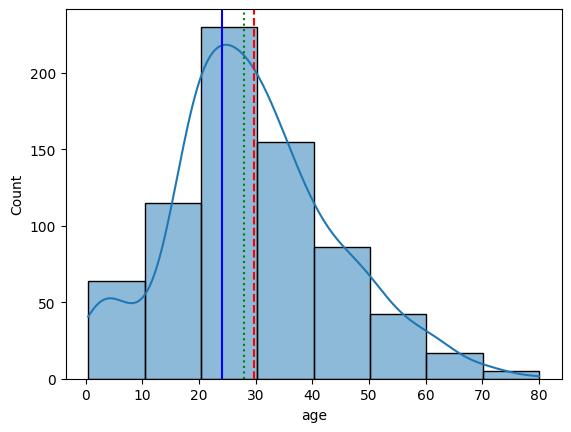

In [63]:
sns.histplot(data=titanic_train.age, kde=True, bins=8)
plt.axvline(titanic_train.age.mean(), color='r', linestyle='--', label="Mean")
plt.axvline(titanic_train.age.median(), color='g', linestyle='dotted', label="Median")
plt.axvline(titanic_train.age.mode()[0], color='b', linestyle='-', label="Mode")

In [ ]:
titanic_train.fare.mean(), titanic_train.fare.median(), titanic_train.fare.mode()

(32.204207968574636,
 14.4542,
 0    8.05
 Name: fare, dtype: float64)

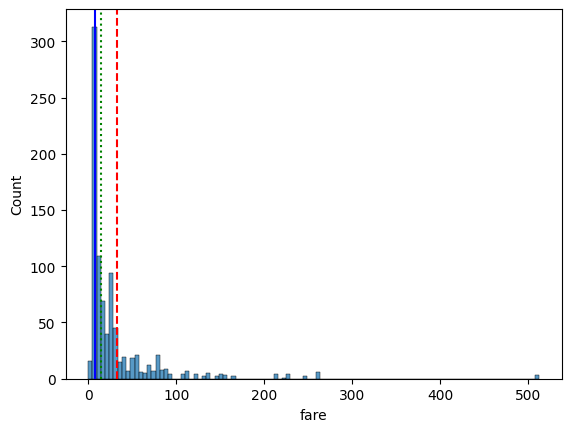

In [ ]:
sns.histplot(data=titanic_train.fare)
plt.axvline(titanic_train.fare.mean(), color='r', linestyle='--', label="Mean")
plt.axvline(titanic_train.fare.median(), color='g', linestyle='dotted', label="Median")
plt.axvline(titanic_train.fare.mode()[0], color='b', linestyle='-', label="Mode")

In [ ]:
titanic_train.median()

survived     0.0000
pclass       3.0000
age         28.0000
sibsp        0.0000
parch        0.0000
fare        14.4542
dtype: float64

In [ ]:
titanic_train.mode(numeric_only=False, dropna=True) # Why 891 row?

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0.0,3.0,"Abbing, Mr. Anthony",male,24.0,0.0,0.0,1601,8.05,B96 B98,S
1,NaN,NaN,"Abbott, Mr. Rossmore Edward",NaN,NaN,NaN,NaN,347082,NaN,C23 C25 C27,NaN
2,NaN,NaN,"Abbott, Mrs. Stanton (Rosa Hunt)",NaN,NaN,NaN,NaN,CA. 2343,NaN,G6,NaN
3,NaN,NaN,"Abelson, Mr. Samuel",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,"Abelson, Mrs. Samuel (Hannah Wizosky)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
886,NaN,NaN,"de Mulder, Mr. Theodore",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
887,NaN,NaN,"de Pelsmaeker, Mr. Alfons",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
888,NaN,NaN,"del Carlo, Mr. Sebastiano",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
889,NaN,NaN,"van Billiard, Mr. Austin Blyler",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
titanic_train[titanic_train.ticket=='1601'].shape

(7, 11)

In [ ]:
titanic_train[titanic_train.ticket=='CA. 2343'].shape

(7, 11)

In [ ]:
titanic_train.mode()['sex'] #[0]

0      male
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
886     NaN
887     NaN
888     NaN
889     NaN
890     NaN
Name: sex, Length: 891, dtype: object

In [ ]:
titanic_train.describe(include=['O'])

,name,sex,ticket,cabin,embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [ ]:
titanic_train.age.isna().sum()

177

<Axes: >

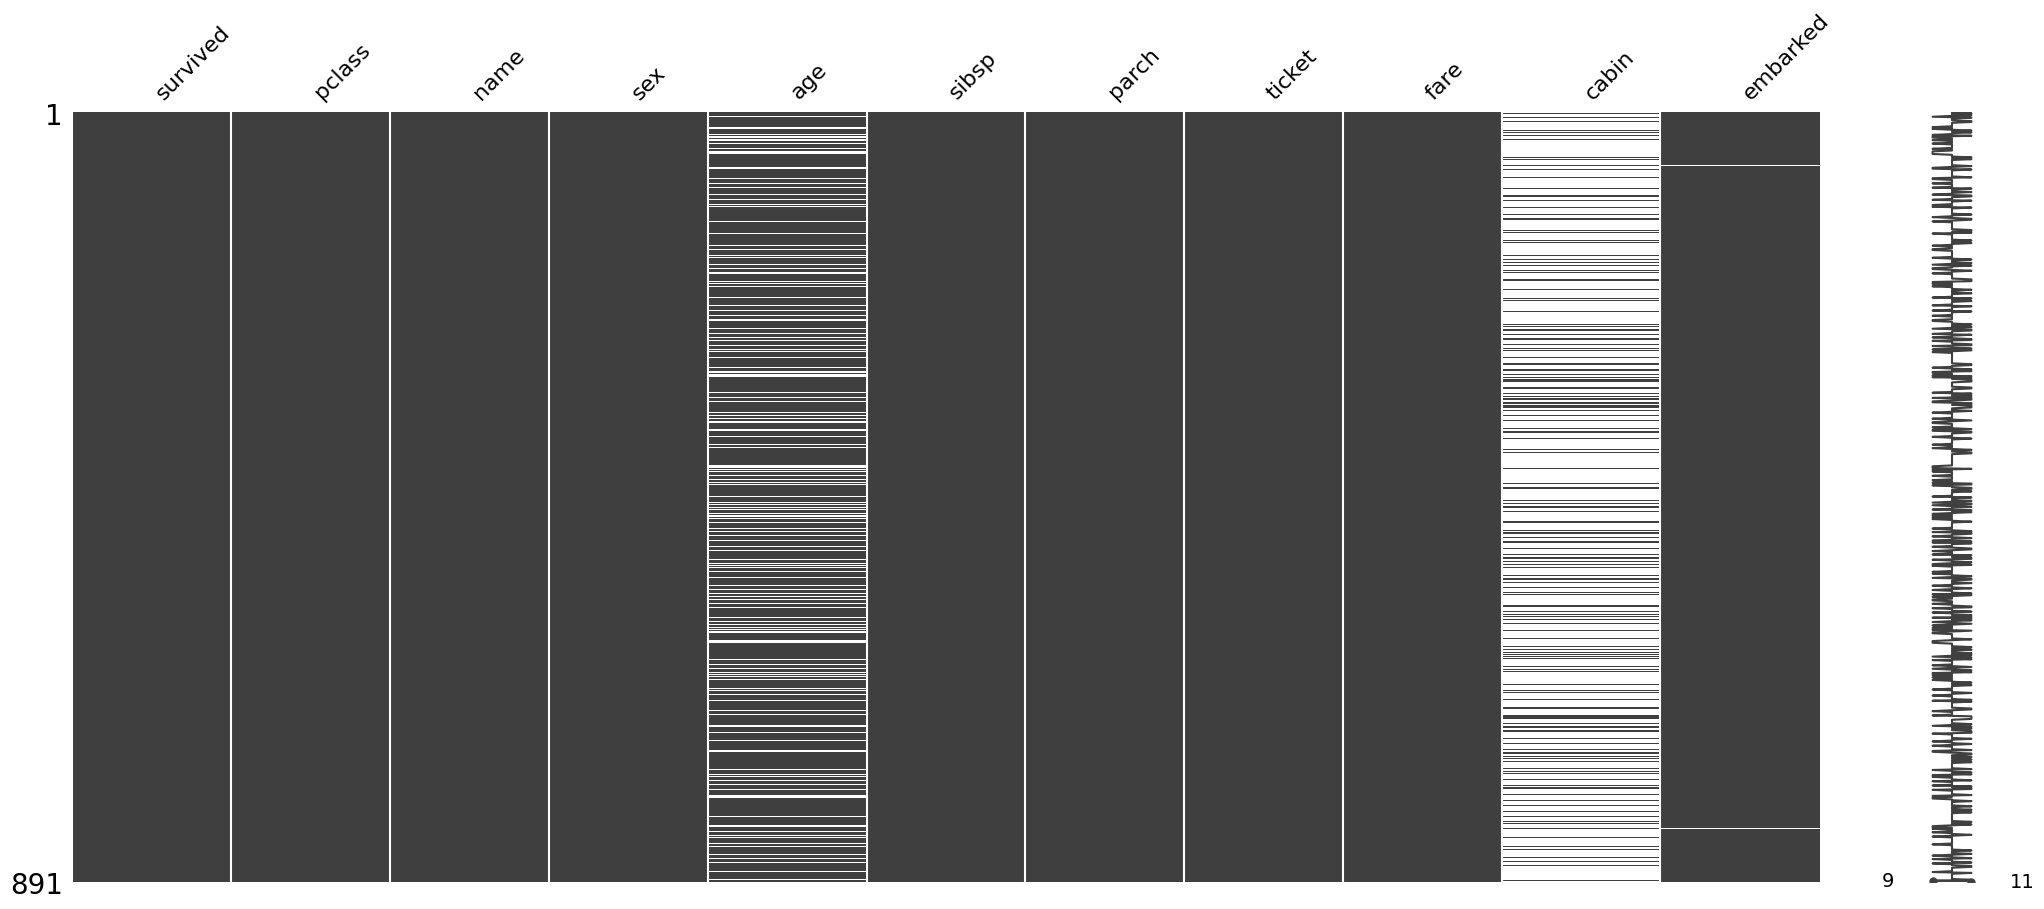

In [ ]:
import missingno as mn
mn.matrix(titanic_train)

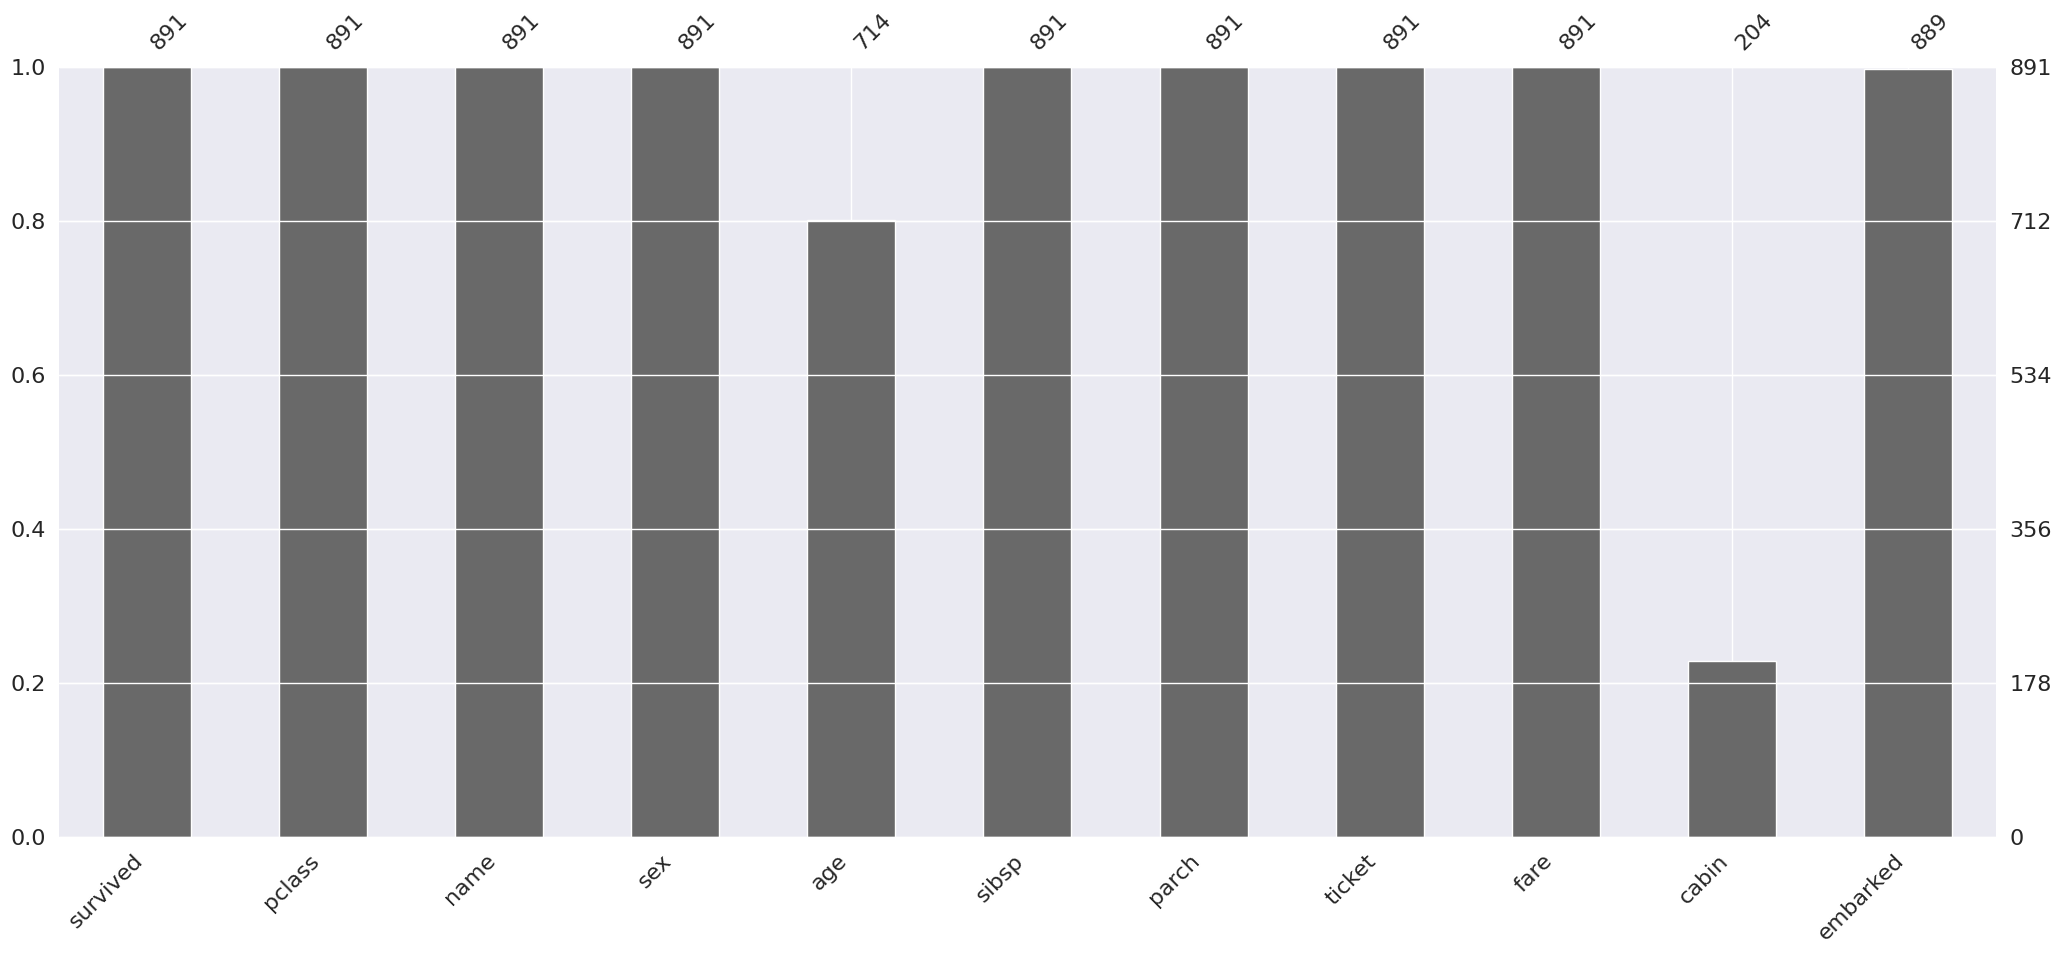

In [ ]:
sns.set()
mn.bar(titanic_train);

#### AGE: Impute mean of all genders for missing values? or of titles?

In [ ]:
titanic_train[titanic_train.sex=='male'].age.mean(), titanic_train[titanic_train.sex=='female'].age.mean()

(30.72664459161148, 27.915708812260537)

In [ ]:
titanic_train[(titanic_train.sex=='male') & (titanic_train.pclass==1)].age.mean(), titanic_train[(titanic_train.sex=='female') & (titanic_train.pclass==1)].age.mean()

(41.28138613861386, 34.61176470588235)

In [ ]:
titanic_train[titanic_train.age.isna()]

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
5,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...
859,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [ ]:
titanic_train.groupby(['sex', 'pclass']).age.mean()

sex     pclass
female  1         34.611765
        2         28.722973
        3         21.750000
male    1         41.281386
        2         30.740707
        3         26.507589
Name: age, dtype: float64

In [ ]:
titanic_train.groupby(['sex', 'pclass']).age.mean()['male'][3]

26.507588932806325

In [ ]:
usefull_grouped_obj = titanic_train.groupby(['sex', 'pclass']).age.mean()

def fillAges(row):
  if not np.isnan(row['age']):
        return row['age']
  return usefull_grouped_obj[row['sex']][row['pclass']]

titanic_train['new_age'] = titanic_train.apply(fillAges, axis = 1)

In [ ]:
titanic_train.tail()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,new_age
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S,27.00
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S,19.00
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S,21.75
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C,26.00
890,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q,32.00


In [ ]:
titanic_train['new_age2'] = titanic_train.groupby(['sex', 'pclass'])["age"].transform(lambda group: group.fillna(group.mean()))

In [ ]:
age_bins = titanic_train.groupby(['sex', 'pclass'])   # ingroup imputation
titanic_train['new_age3'] = age_bins['age'].apply(lambda x: x.fillna(x.mean()));

In [ ]:
titanic_train.sample(5)

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,new_age,new_age2,new_age3
537,1,1,"LeRoy, Miss. Bertha",female,30.0,0,0,PC 17761,106.4250,NaN,C,30.000000,30.000000,30.000000
719,0,3,"Johnson, Mr. Malkolm Joackim",male,33.0,0,0,347062,7.7750,NaN,S,33.000000,33.000000,33.000000
196,0,3,"Mernagh, Mr. Robert",male,NaN,0,0,368703,7.7500,NaN,Q,26.507589,26.507589,26.507589
220,1,3,"Sunderland, Mr. Victor Francis",male,16.0,0,0,SOTON/OQ 392089,8.0500,NaN,S,16.000000,16.000000,16.000000
384,0,3,"Plotcharsky, Mr. Vasil",male,NaN,0,0,349227,7.8958,NaN,S,26.507589,26.507589,26.507589


In [ ]:
# Transform in Pandas: https://dfedorov.spb.ru/pandas/%D0%9F%D0%BE%D0%BD%D0%B8%D0%BC%D0%B0%D0%BD%D0%B8%D0%B5%20%D1%84%D1%83%D0%BD%D0%BA%D1%86%D0%B8%D0%B8%20transform%20%D0%B2%20Pandas.html
# Data Science Handbook: https://nbviewer.org/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/03.08-Aggregation-and-Grouping.ipynb

#### EMBARKED: Impute mode for embarked column?


In [ ]:
titanic_train[titanic_train.embarked.isna()]

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,new_age,new_age2,new_age3
61,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,38.0,38.0,38.0
829,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,62.0,62.0,62.0


In [ ]:
titanic_train.embarked.mode()

0    S
Name: embarked, dtype: object

In [ ]:
titanic_train.embarked.value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

In [ ]:
titanic_train['embarked_mode'] = titanic_train['embarked'].fillna(titanic_train['embarked'].mode()[0])

In [ ]:
titanic_train[titanic_train.embarked.isna()]

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,new_age,new_age2,new_age3,embarked_mode
61,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,38.0,38.0,38.0,S
829,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,62.0,62.0,62.0,S


In [ ]:
titanic_train.iloc[[61]]

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,new_age,new_age2,new_age3,embarked_mode
61,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,38.0,38.0,38.0,S


#### CABIN: are these real missing values?

In [ ]:
titanic_train[titanic_train.cabin.isna()].shape

(687, 15)

In [ ]:
# maybe we could delete the whole column since there are too many missing?
titanic_train.dropna(axis='index', subset=['cabin'])   # delete only rows
# btw, will this code affect original titanic_train object?

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,new_age,new_age2,new_age3,embarked_mode
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,38.0,38.0,C
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0,35.0,35.0,S
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,54.0,54.0,54.0,S
10,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,4.0,4.0,4.0,S
11,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,58.0,58.0,58.0,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S,47.0,47.0,47.0,S
872,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S,33.0,33.0,33.0,S
879,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C,56.0,56.0,56.0,C
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,19.0,19.0,19.0,S


In [ ]:
# maybe drop the whole column?
titanic_train.drop(columns=['cabin'])

In [ ]:
titanic_train[~titanic_train.cabin.isna()]

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,new_age,new_age2,new_age3,embarked_mode
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,38.0,38.0,C
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0,35.0,35.0,S
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,54.0,54.0,54.0,S
10,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,4.0,4.0,4.0,S
11,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,58.0,58.0,58.0,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S,47.0,47.0,47.0,S
872,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S,33.0,33.0,33.0,S
879,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C,56.0,56.0,56.0,C
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,19.0,19.0,19.0,S


In [ ]:
titanic_train['has_cabin'] = titanic_train.cabin.notnull().astype(int)

In [ ]:
titanic_train.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,new_age,new_age2,new_age3,embarked_mode,has_cabin
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,22.0,22.0,S,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,38.0,38.0,C,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,26.0,26.0,S,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0,35.0,35.0,S,1
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0,35.0,35.0,S,0


In [ ]:
pd.crosstab(titanic_train.survived, titanic_train.has_cabin)

has_cabin,0,1
survived,,
0,481,68
1,206,136


In [ ]:
titanic_train.cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [ ]:
titanic_train['cabin'] = titanic_train['cabin'].fillna('-')

In [ ]:
titanic_train[titanic_train.cabin.isna()]

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,new_age,new_age2,new_age3,embarked_mode,has_cabin


In [ ]:
titanic_train['deck_letter'] = titanic_train['cabin'].apply(lambda x: x[0])

In [ ]:
titanic_train.tail()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,new_age,new_age2,new_age3,embarked_mode,has_cabin,deck_letter
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,-,S,27.00,27.00,27.00,S,0,-
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S,19.00,19.00,19.00,S,1,B
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,-,S,21.75,21.75,21.75,S,0,-
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C,26.00,26.00,26.00,C,1,C
890,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,-,Q,32.00,32.00,32.00,Q,0,-


In [ ]:
titanic_train.deck_letter.unique()

array(['-', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

### Simple Imputer

Using SimpleImputer allows us to apply the method to the validation and test subsets. **Please note that Imputers must be trained on training data** (you cannot use fit on test data, but you can use transform method).

**missing_values**: int, float, str, np.nan, None or pandas.NA, default=np.nan
The placeholder for the missing values. All occurrences of missing_values will be imputed. For pandas’ dataframes with nullable integer dtypes with missing values, missing_values can be set to either np.nan or pd.NA.

**strategy**: str, default=’mean’
The imputation strategy.

If “mean”, then replace missing values using the mean along each column. Can only be used with numeric data.

If “median”, then replace missing values using the median along each column. Can only be used with numeric data.

If “most_frequent”, then replace missing using the most frequent value along each column. Can be used with strings or numeric data. If there is more than one such value, only the smallest is returned.

If “constant”, then replace missing values with fill_value. Can be used with strings or numeric data.


**fill_value**: str or numerical value, default=None
When strategy == “constant”, fill_value is used to replace all occurrences of missing_values. For string or object data types, fill_value must be a string. If None, fill_value will be 0 when imputing numerical data and “missing_value” for strings or object data types.

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
imputer = SimpleImputer(strategy='constant', fill_value=-1)

imputer.fit(titanic_train[['age']])

SimpleImputer(fill_value=-1, strategy='constant')

In [ ]:
titanic_train.sample(5)

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,new_age,new_age2,new_age3,embarked_mode,has_cabin,deck_letter,age_imputer1
574,0,3,"Rush, Mr. Alfred George John",male,16.0,0,0,A/4. 20589,8.05,-,S,16.00,16.00,16.00,S,0,-,16.0
770,0,3,"Lievens, Mr. Rene Aime",male,24.0,0,0,345781,9.50,-,S,24.00,24.00,24.00,S,0,-,24.0
660,1,1,"Frauenthal, Dr. Henry William",male,50.0,2,0,PC 17611,133.65,-,S,50.00,50.00,50.00,S,0,-,50.0
84,1,2,"Ilett, Miss. Bertha",female,17.0,0,0,SO/C 14885,10.50,-,S,17.00,17.00,17.00,S,0,-,17.0
330,1,3,"McCoy, Miss. Agnes",female,NaN,2,0,367226,23.25,-,Q,21.75,21.75,21.75,Q,0,-,-1.0


In [ ]:
titanic_train['age_imputer1'] = imputer.transform(titanic_train[['age']])

In [ ]:
print(titanic_train['age_imputer1'].isnull().sum())

0


In [ ]:
.fit(train)
.transform(train\val\test)

In [ ]:
imputer = SimpleImputer(strategy='constant', fill_value=-1)
imputer.transform(titanic_train[['age']])

NotFittedError: This SimpleImputer instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
class CustomObject:
  def __init__(self):
    self.val=1

imputer = SimpleImputer(strategy='constant', fill_value=CustomObject())
imputer.fit(titanic_train[['age']])
#imputer.transform(titanic_train[['age']])

ValueError: 'fill_value'=<__main__.CustomObject object at 0x7f8fe4ef3100> is invalid. Expected a numerical value when imputing numerical data

In [ ]:
imputer_median = SimpleImputer(strategy = 'median')
imputer_mean = SimpleImputer(strategy = 'mean')
imputer_mode = SimpleImputer(strategy = 'most_frequent')

imputer_median.fit(titanic_train[['age']])
imputer_mode.fit(titanic_train[['embarked']])
imputer_mean.fit(titanic_train[['age']])

titanic_train['age_median_imputer'] = imputer_median.transform(titanic_train[['age']])
titanic_train['age_mean_imputer'] = imputer_mean.transform(titanic_train[['age']])
titanic_train['embarked_imputer_mode'] = imputer_mode.transform(titanic_train[['embarked']])

In [ ]:
imputer_mode.transform(titanic_train[['embarked']])

array([['S'],
       ['C'],
       ['S'],
       ['S'],
       ['S'],
       ['Q'],
       ['S'],
       ['S'],
       ['S'],
       ['C'],
       ['S'],
       ['S'],
       ['S'],
       ['S'],
       ['S'],
       ['S'],
       ['Q'],
       ['S'],
       ['S'],
       ['C'],
       ['S'],
       ['S'],
       ['Q'],
       ['S'],
       ['S'],
       ['S'],
       ['C'],
       ['S'],
       ['Q'],
       ['S'],
       ['C'],
       ['C'],
       ['Q'],
       ['S'],
       ['C'],
       ['S'],
       ['C'],
       ['S'],
       ['S'],
       ['C'],
       ['S'],
       ['S'],
       ['C'],
       ['C'],
       ['Q'],
       ['S'],
       ['Q'],
       ['Q'],
       ['C'],
       ['S'],
       ['S'],
       ['S'],
       ['C'],
       ['S'],
       ['C'],
       ['S'],
       ['S'],
       ['C'],
       ['S'],
       ['S'],
       ['C'],
       ['S'],
       ['S'],
       ['S'],
       ['C'],
       ['C'],
       ['S'],
       ['S'],
       ['S'],
       ['S'],
       ['S'],
      

(0.0, 300.0)

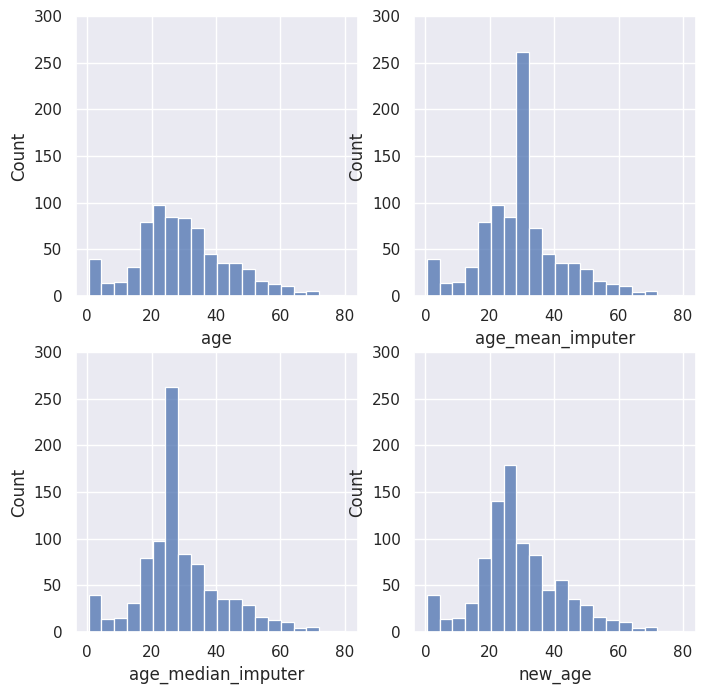

In [ ]:
# Lets see how central tendency imptation may change the shape of distribution

fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(8, 8))
axs = axs.flatten()
sns.histplot(titanic_train['age'], bins=20, ax=axs[0])
axs[0].set_ylim(0,300)
#axs[0].legend(title='Age distribution before imputation')

sns.histplot(titanic_train['age_mean_imputer'], bins=20, ax=axs[1])
#axs[1].legend(title='Age distribution after mean imputation')
axs[1].set_ylim(0,300)
sns.histplot(titanic_train['age_median_imputer'], bins=20, ax=axs[2])
#axs[2].legend(title='Age distribution after median imputation')
axs[2].set_ylim(0,300)
sns.histplot(titanic_train['new_age'], bins=20, ax=axs[3])
#axs[3].legend(title='Age distribution after more fancy imputation')
axs[3].set_ylim(0,300)

In [ ]:
imputer_mean.__dict__

# statistics_: array of shape (n_features,) - The imputation fill value for each feature
# indicator_: Indicator used to add binary indicators for missing values

{'missing_values': nan,
 'add_indicator': False,
 'keep_empty_features': False,
 'strategy': 'mean',
 'fill_value': None,
 'verbose': 'deprecated',
 'copy': True,
 'feature_names_in_': array(['age'], dtype=object),
 'n_features_in_': 1,
 '_fit_dtype': dtype('float64'),
 'indicator_': None,
 'statistics_': array([29.69911765])}

In [ ]:
# The MissingIndicator transformer is useful to transform a dataset into corresponding binary matrix indicating the presence of missing values in the dataset.
imputer_mode = SimpleImputer(strategy = 'most_frequent', add_indicator=True)
imputer_mode.fit(titanic_train[['embarked']])
imputer_mode.indicator_

MissingIndicator(error_on_new=False)

In [ ]:
newX = imputer_mode.transform(titanic_train[['embarked']])
newX = pd.DataFrame(newX)
newX
newX[newX[1]==True]

,0,1
61,S,True
829,S,True


In [ ]:
titanic_train[['cabin']]

,cabin
0,-
1,C85
2,-
3,C123
4,-
...,...
886,-
887,B42
888,-
889,C148


In [ ]:
imputer_constant = SimpleImputer(strategy='constant', fill_value='UNKNOWN', missing_values='-')

imputer_constant.fit(titanic_train[['cabin']])
titanic_train['cabin_imputer_unknown'] = imputer_constant.transform(titanic_train[['cabin']])

In [ ]:
titanic_train.head(3)

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,...,new_age2,new_age3,embarked_mode,has_cabin,deck_letter,age_imputer1,age_median_imputer,age_mean_imputer,embarked_imputer_mode,cabin_imputer_unknown
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,-,...,22.0,22.0,S,0,-,22.0,22.0,22.0,S,UNKNOWN
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,...,38.0,38.0,C,1,C,38.0,38.0,38.0,C,C85
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,-,...,26.0,26.0,S,0,-,26.0,26.0,26.0,S,UNKNOWN


In [ ]:
imputer = SimpleImputer()
X = np.array([[np.nan, 1], [np.nan, 2], [np.nan, 3]])
X, imputer.fit_transform(X)

(array([[nan,  1.],
        [nan,  2.],
        [nan,  3.]]),
 array([[1.],
        [2.],
        [3.]]))

In [ ]:
imputer.set_params(keep_empty_features=True)
SimpleImputer(keep_empty_features=True)
imputer.fit_transform(X)

array([[0., 1.],
       [0., 2.],
       [0., 3.]])

In [ ]:
titanic_test.tail()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
413,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [ ]:
titanic_test['age_imputed'] = imputer_mean.transform(titanic_test[['age']])

In [ ]:
titanic_test.tail()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,age_imputed
413,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,29.699118
414,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,39.000000
415,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,38.500000
416,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,29.699118
417,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C,29.699118


In [ ]:
# List of algs that can handle missing values
# https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

#### A bit of feature engineering?




In [ ]:
titanic_train["name"].iloc[:5]

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: name, dtype: object

In [ ]:
import re

def get_title(name):
    """
    Use a regular expression to search for a title.  Titles always consist of
    capital and lowercase letters, and end with a period.

    Takes a name as input and returns the title string as output
    """

    title_search = re.search(' ([A-Za-z]+)\.', name)

    if title_search:
        return title_search.group(1)
    return ""

In [ ]:
titanic_train["title"] = titanic_train["name"].apply(get_title)

In [ ]:
titanic_train.title.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [ ]:
titanic_train.title.value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: title, dtype: int64

In [ ]:
Title_Dictionary = {
                        "Capt":       "Officer",
                        "Col":        "Officer",
                        "Major":      "Officer",
                        "Jonkheer":   "Royal",
                        "Don":        "Royal",
                        "Sir" :       "Royal",
                        "Dr":         "Officer",
                        "Rev":        "Officer",
                        "Countess":   "Royal",
                        "Dona":       "Royal",
                        "Mme":        "Mrs",
                        "Mlle":       "Miss",
                        "Ms":         "Mrs",
                        "Mr" :        "Mr",
                        "Mrs" :       "Mrs",
                        "Miss" :      "Miss",
                        "Master" :    "Master",
                        "Lady" :      "Royal"

                        }

In [ ]:
def titlemap(x):
    return Title_Dictionary[x]

titanic_train["title"] = titanic_train["title"].apply(titlemap)

In [ ]:
titanic_train.title.value_counts()

Mr         517
Miss       184
Mrs        127
Master      40
Officer     18
Royal        5
Name: title, dtype: int64

### Multivariate feature imputation

Multivariate feature imputation uses the information from the entire dataset to estimate and impute the missing values.

Sklearn: "In each step, a feature column is designated as output y and the other feature columns are treated as inputs X. A regressor is fit on (X, y) for known y. Then, the regressor is used to predict the missing values of y. This is done for each feature in an iterative fashion and then is repeated for max_iter imputation rounds. "

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
titanic_train[titanic_train.age.isna()].head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,...,new_age3,embarked_mode,has_cabin,deck_letter,age_imputer1,age_median_imputer,age_mean_imputer,embarked_imputer_mode,cabin_imputer_unknown,title
5,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,-,...,26.507589,Q,0,-,-1.0,28.0,29.699118,Q,UNKNOWN,Mr
17,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,-,...,30.740707,S,0,-,-1.0,28.0,29.699118,S,UNKNOWN,Mr
19,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,-,...,21.750000,C,0,-,-1.0,28.0,29.699118,C,UNKNOWN,Mrs
26,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,-,...,26.507589,C,0,-,-1.0,28.0,29.699118,C,UNKNOWN,Mr
28,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,-,...,21.750000,Q,0,-,-1.0,28.0,29.699118,Q,UNKNOWN,Miss


In [ ]:
impute_estimator = KNeighborsRegressor(
    n_neighbors=5,
    p = 1  # set p=1 to use manhanttan distance to reduce effect from outliers
)

imputer = IterativeImputer(
    max_iter = 10,
    random_state = 0,
    estimator = impute_estimator)

imputer.fit(titanic_train[['pclass', 'age', 'sibsp',	'parch', 'fare']])  # sex and embarked cant be used -> need to encode
transformed_train = imputer.transform(titanic_train[['pclass', 'age', 'sibsp',	'parch', 'fare']])

In [ ]:
titanic_train['age_knn_imputed'] = transformed_train[:, 1]

In [ ]:
titanic_train.iloc[[5,17,19]]

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,...,embarked_mode,has_cabin,deck_letter,age_imputer1,age_median_imputer,age_mean_imputer,embarked_imputer_mode,cabin_imputer_unknown,title,age_knn_imputed
5,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,-,...,Q,0,-,-1.0,28.0,29.699118,Q,UNKNOWN,Mr,24.2
17,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,-,...,S,0,-,-1.0,28.0,29.699118,S,UNKNOWN,Mr,32.7
19,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,-,...,C,0,-,-1.0,28.0,29.699118,C,UNKNOWN,Mrs,32.5


<Axes: xlabel='age_knn_imputed', ylabel='Count'>

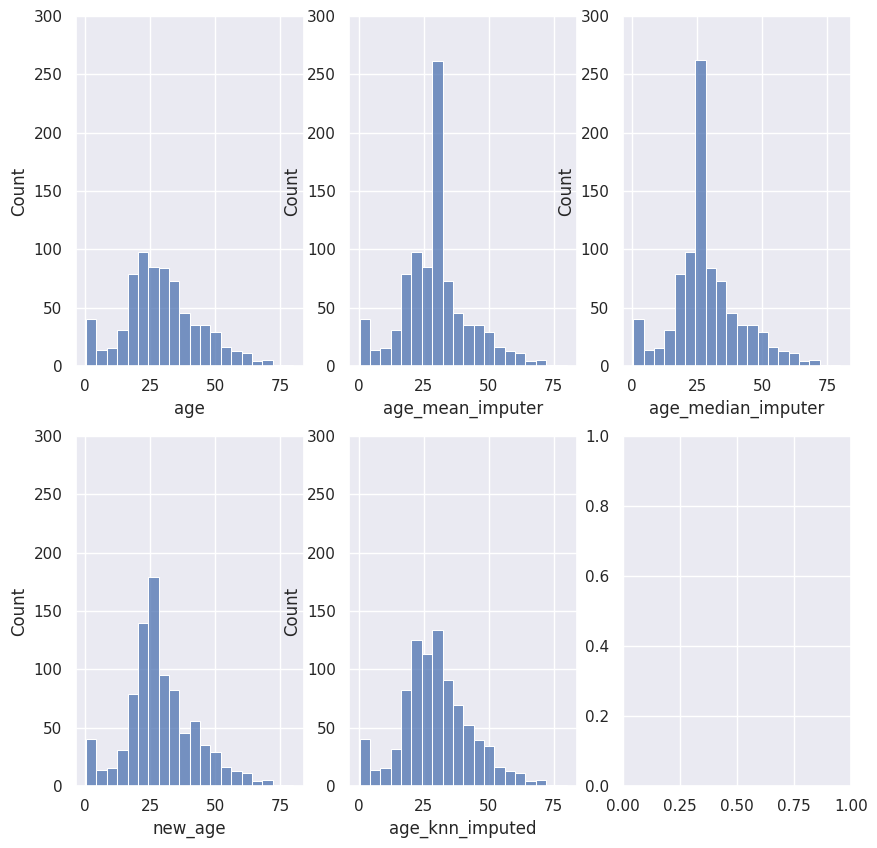

In [ ]:
fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(10, 10))
axs = axs.flatten()
axs[0].set_ylim(0,300)
sns.histplot(titanic_train['age'], bins=20, ax=axs[0])
axs[1].set_ylim(0,300)
sns.histplot(titanic_train['age_mean_imputer'], bins=20, ax=axs[1])
axs[2].set_ylim(0,300)
sns.histplot(titanic_train['age_median_imputer'], bins=20, ax=axs[2])
axs[3].set_ylim(0,300)
sns.histplot(titanic_train['new_age'], bins=20, ax=axs[3])
axs[4].set_ylim(0,300)
sns.histplot(titanic_train['age_knn_imputed'], bins=20, ax=axs[4])


## Outliers

**Definition**: An outlier is an observation which deviates so much from the other observations as to arouse suspicions that it was generated by a different mechanism.

Outliers, depending on the context, either **deserve special attention or should be completely ignored**. For example, an unusual transaction on a credit card is usually a sign of fraudulent activity, while a height of 1600cm of a person is very likely due to measurement error and should be filter out or impute with something else.
<br>
<br>
**Why Outliers Matter**

The presence of outliers may:
* make algorithm not work properly
* introduce noises to dataset
* make samples less representative
<br>
<br>

**Some algorithms are very sensitive to outliers.**

For example, Adaboost may treat outliers as "hard" cases and put tremendous weights on outliers, therefore producing a model with bad generalization. Any algorithms that rely on means/variance are sensitive to outliers as those stats are greatly influenced by extreme values.

Examples of sensitive algorithms: Linear Regression, Logistic Regression, Kmeans, Hierarichal clastering, PCA, Neural Networks.
<br>
<br>
**Some algorithm are more robust to outliers.**

For example, decision trees tend to ignore the presence of outliers when creating the branches of their trees. Typically, trees make splits by asking if variable x >= value t, and therefore the outlier will fall on each side of the branch, but it will be treated equally as the remaining values, regardless of its magnitude.

Examples of robust algorithms: Naivye Bayes Classifier, SVM, Decision Trees,
Ensembles (Random Forest, XGboost, Gradient Boosting), KNN.
<br>
<br>
**Outlier Detection Methods**


Many of them! Some of them are:

* **Detect by arbitrary boundary**: identify outliers based on arbitrary boundaries. Fexible approach. But require business understanding.

* **Interquartile Range method**: more robust than Mean & SD method as it use quantile & IQR. Resilient to extremes. But can be too aggressive.

* **z-score**

**How to Handle Outliers**

* **Mean/Median/Mode Imputation**
Replacing the outlier by mean/median/most frequent values of
that variable. Preserve distribution. But lose information of outlier if there
is really one.

* **Discretization**
Transform continuous variables into discrete variables. Minimizes the impact
from outlier. But lose information of outlier if there is really one.

* **Imputation with arbitrary value**
Flexiable, but may be hard to decide on the value.

* **Windsorization**
Top-coding & bottom coding (capping the maximum of a distribution at an arbitrarily set value, vice versa). Prevents model over-fitting, but distorts
distribution.

* **Discard outliers**
Drop all the observations that are outliers. Lose information of outlier if there is one.

***Why would we care about outliers?***

1. They can affect some ML models` performance. **Some algorithms are sensitive to outliers influence** (e.g. linear regression and k-nearest neighbors). These models attempt to draw patterns from the data, but outliers can mislead the process, skewing the regression line or decision boundary. As a result, the model may fail to generalize well and make inaccurate predictions on new data. Models like decision trees and random forests can handle outliers more gracefully.

2. Data Distribution.
The presence of outliers can distort the underlying data distribution. In datasets with features normally distributed, outliers **can make the distribution appear skewed or non-normal**.

3. **Overfitting**.
One of the most insidious consequences of outliers is overfitting. In this scenario, the model becomes overly complex and starts **fitting the noise** present in the data rather than the true underlying patterns. Accommodating outliers can lead to poor generalization, rendering the model ineffective for new data.

6. Domain-Specific Impact.
In certain scenarios, outliers can be genuinely important data points representing **rare events or critical situations**. For example, in fraud detection, outliers could indicate fraudulent activities, while in medical diagnosis, they might point to severe anomalies. Here, it is imperative to carefully analyze and verify the significance of the outliers.

7. Feature Engineering.
Outliers can also influence feature engineering decisions. **Scaling methods**, such as Min-Max scaling, can be sensitive to outliers, while more robust methods, like Z-score normalization, are less affected by their presence.


[Source](https://harshjadhav100.medium.com/the-impact-of-outliers-in-machine-learning-6cf4e4d33f21)

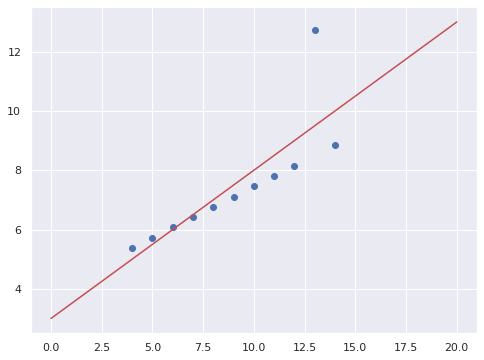

### Identify outliers by IQR

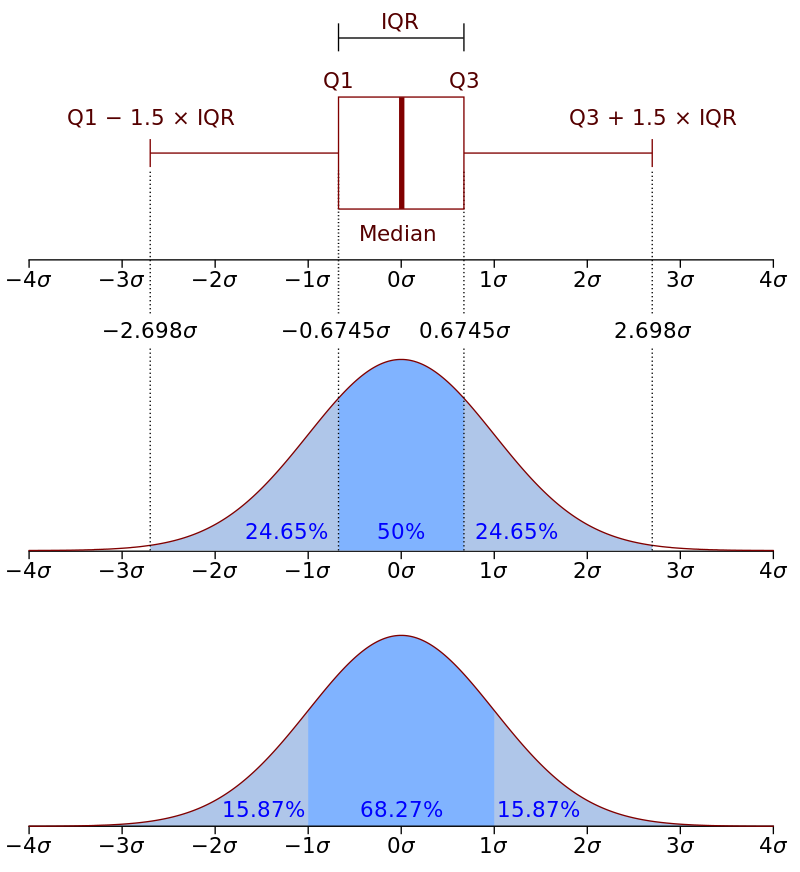

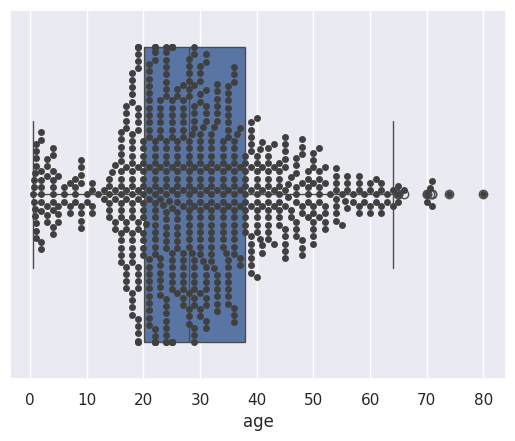

In [ ]:
sns.boxplot(titanic_train['age'], orient="h")
sns.swarmplot(titanic_train['age'], color=".25", orient="h")
plt.show()

How a boxplot identifies outliers?

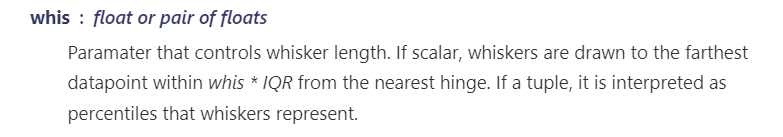

whis=1.5 by default

In [ ]:
# Proportion of the IQR past the low and high quartiles to extend the plot whiskers.
# For a normal distribution, the interquartile range contains 50% of the population and 1.5 * IQR contains about 99%.

In [ ]:
Q1 = titanic_train.age.quantile(0.25)
Q3 = titanic_train.age.quantile(0.75)
IQR = Q3 - Q1
whis = 1.5

# It's an outlier if it is less than:
# Q1 - 1.5 * IQR
# or if it is greater than:
# Q3 + 1.5 * IQR

less_cond = Q1 - whis * IQR
greater_cond = Q3 + whis * IQR

print(f"{Q1=}, {Q3=}, {IQR=}, {whis*IQR=}, {less_cond=}, {greater_cond=}")

titanic_train[(titanic_train['age'] < less_cond) | (titanic_train['age'] > greater_cond)]

Q1=20.125, Q3=38.0, IQR=17.875, whis*IQR=26.8125, less_cond=-6.6875, greater_cond=64.8125


,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,...,embarked_mode,has_cabin,deck_letter,age_imputer1,age_median_imputer,age_mean_imputer,embarked_imputer_mode,cabin_imputer_unknown,title,age_knn_imputed
33,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,-,...,S,0,-,66.0,66.0,66.0,S,UNKNOWN,Mr,66.0
54,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,...,C,1,B,65.0,65.0,65.0,C,B30,Mr,65.0
96,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,...,C,1,A,71.0,71.0,71.0,C,A5,Mr,71.0
116,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,-,...,Q,0,-,70.5,70.5,70.5,Q,UNKNOWN,Mr,70.5
280,0,3,"Duane, Mr. Frank",male,65.0,0,0,336439,7.7500,-,...,Q,0,-,65.0,65.0,65.0,Q,UNKNOWN,Mr,65.0
456,0,1,"Millet, Mr. Francis Davis",male,65.0,0,0,13509,26.5500,E38,...,S,1,E,65.0,65.0,65.0,S,E38,Mr,65.0
493,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,-,...,C,0,-,71.0,71.0,71.0,C,UNKNOWN,Mr,71.0
630,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,...,S,1,A,80.0,80.0,80.0,S,A23,Mr,80.0
672,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,-,...,S,0,-,70.0,70.0,70.0,S,UNKNOWN,Mr,70.0
745,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,...,S,1,B,70.0,70.0,70.0,S,B22,Officer,70.0


In [ ]:
outliers = titanic_train[(titanic_train['age'] < less_cond) | (titanic_train['age'] > greater_cond)]
outliers.shape

(11, 24)

In [ ]:
titanic_train[titanic_train['age'] > greater_cond]

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,...,embarked_mode,has_cabin,deck_letter,age_imputer1,age_median_imputer,age_mean_imputer,embarked_imputer_mode,cabin_imputer_unknown,title,age_knn_imputed
33,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,-,...,S,0,-,66.0,66.0,66.0,S,UNKNOWN,Mr,66.0
54,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,...,C,1,B,65.0,65.0,65.0,C,B30,Mr,65.0
96,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,...,C,1,A,71.0,71.0,71.0,C,A5,Mr,71.0
116,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,-,...,Q,0,-,70.5,70.5,70.5,Q,UNKNOWN,Mr,70.5
280,0,3,"Duane, Mr. Frank",male,65.0,0,0,336439,7.7500,-,...,Q,0,-,65.0,65.0,65.0,Q,UNKNOWN,Mr,65.0
456,0,1,"Millet, Mr. Francis Davis",male,65.0,0,0,13509,26.5500,E38,...,S,1,E,65.0,65.0,65.0,S,E38,Mr,65.0
493,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,-,...,C,0,-,71.0,71.0,71.0,C,UNKNOWN,Mr,71.0
630,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,...,S,1,A,80.0,80.0,80.0,S,A23,Mr,80.0
672,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,-,...,S,0,-,70.0,70.0,70.0,S,UNKNOWN,Mr,70.0
745,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,...,S,1,B,70.0,70.0,70.0,S,B22,Officer,70.0


In [ ]:
titanic_train.describe()

,survived,pclass,age,sibsp,parch,fare,new_age,new_age2,new_age3,has_cabin,age_imputer1,age_median_imputer,age_mean_imputer,age_knn_imputed
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,29.318643,29.318643,29.318643,0.228956,23.600640,29.361582,29.699118,29.980626
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,13.281103,13.281103,13.281103,0.420397,17.867496,13.019697,13.002015,13.431778
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.420000,0.420000,0.420000,0.000000,-1.000000,0.420000,0.420000,0.420000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,21.750000,21.750000,21.750000,0.000000,6.000000,22.000000,22.000000,21.492000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,26.507589,26.507589,26.507589,0.000000,24.000000,28.000000,29.699118,29.000000
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,36.000000,36.000000,36.000000,0.000000,35.000000,35.000000,35.000000,38.500000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,80.000000,80.000000,80.000000,1.000000,80.000000,80.000000,80.000000,80.000000


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 55.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 57.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


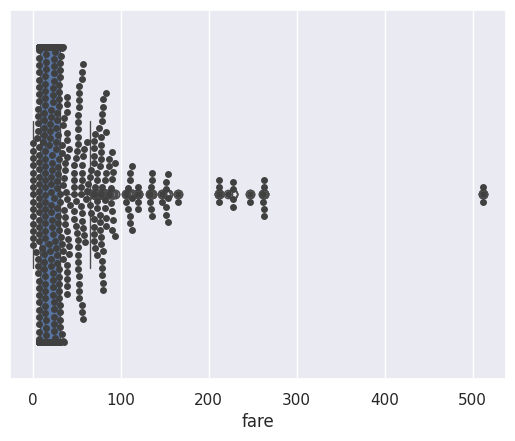

In [ ]:
sns.boxplot(titanic_train['fare'], orient="h")
sns.swarmplot(titanic_train['fare'], color=".25", orient="h")
plt.show()

In [ ]:
Q1 = titanic_train.fare.quantile(0.25)
Q3 = titanic_train.fare.quantile(0.75)
IQR = Q3 - Q1
whis = 1.5

# It's an outlier if it is less than:
# Q1 - 1.5 * IQR
# or if it is greater than:
# Q3 + 1.5 * IQR

less_cond = Q1 - whis * IQR
greater_cond = Q3 + whis * IQR

print(f"{Q1=}, {Q3=}, {IQR=}, {whis*IQR=}, {less_cond=}, {greater_cond=}")

titanic_train[(titanic_train['fare'] < less_cond) | (titanic_train['fare'] > greater_cond)].shape

Q1=7.9104, Q3=31.0, IQR=23.0896, whis*IQR=34.6344, less_cond=-26.724, greater_cond=65.6344


(116, 24)

In [ ]:
# Dropping THAT much data in a small dataset doesnt seem adequate. Maybe replace with some values?
# Replace the values by capping with the upper and lower limits.

In [ ]:
titanic_train[(titanic_train['fare'] < less_cond) | (titanic_train['fare'] > greater_cond)].head(2)

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,...,embarked_mode,has_cabin,deck_letter,age_imputer1,age_median_imputer,age_mean_imputer,embarked_imputer_mode,cabin_imputer_unknown,title,age_knn_imputed
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,...,C,1,C,38.0,38.0,38.0,C,C85,Mrs,38.0
27,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,...,S,1,C,19.0,19.0,19.0,S,C23 C25 C27,Mr,19.0


In [ ]:
titanic_train.loc[titanic_train['fare'] > greater_cond].shape

(116, 24)

In [ ]:
titanic_train.loc[titanic_train['fare'] < less_cond].shape

(0, 24)

In [ ]:
titanic_train_copy = titanic_train.copy()

In [ ]:
titanic_train.loc[titanic_train['fare'] > greater_cond, 'fare'] = greater_cond

In [ ]:
titanic_train.loc[titanic_train['fare'] < less_cond, 'fare'] = min(titanic_train['fare'])

In [ ]:
titanic_train.iloc[27]  # Still way TOO many replacements...

survived                                              0
pclass                                                1
name                     Fortune, Mr. Charles Alexander
sex                                                male
age                                                19.0
sibsp                                                 3
parch                                                 2
ticket                                            19950
fare                                            65.6344
cabin                                       C23 C25 C27
embarked                                              S
new_age                                            19.0
new_age2                                           19.0
new_age3                                           19.0
embarked_mode                                         S
has_cabin                                             1
deck_letter                                           C
age_imputer1                                    

In [ ]:
# lets check how correlation changes with and without outliers
#titanic_train_copy[['age', 'survived']].corr(method='spearman'),
titanic_train[['age', 'survived']].corr(method='spearman'), titanic_train[['age', 'survived']].drop(index=outliers.index).corr(method='spearman'),  # without outliers

(               age  survived
 age       1.000000 -0.052565
 survived -0.052565  1.000000,
                age  survived
 age       1.000000 -0.036552
 survived -0.036552  1.000000)

In [ ]:
from matplotlib.cbook import boxplot_stats

boxplot_stats(titanic_train.age[~titanic_train.age.isna()])[0]['fliers']

array([66. , 65. , 71. , 70.5, 65. , 65. , 71. , 80. , 70. , 70. , 74. ])

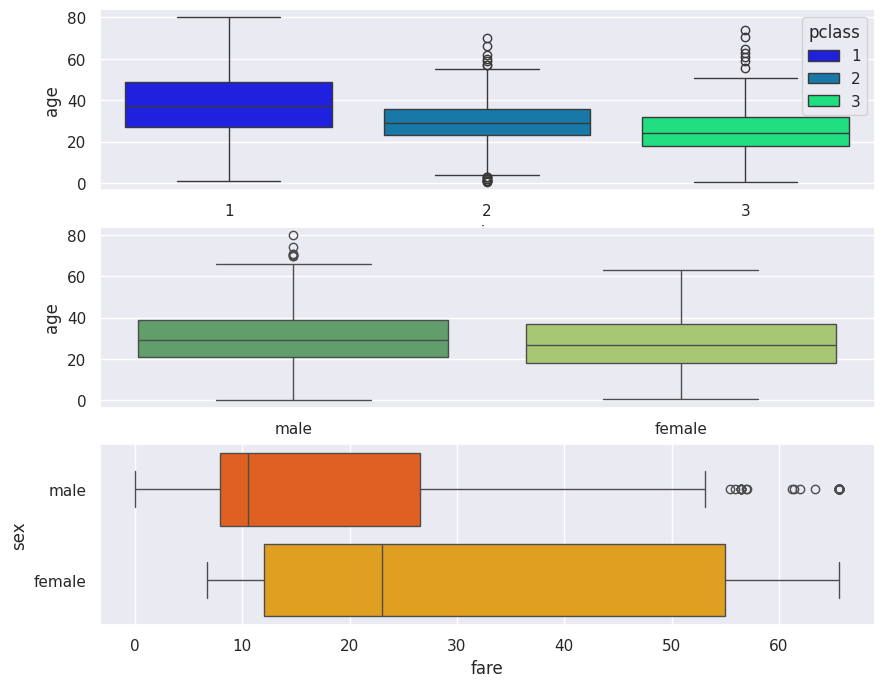

In [ ]:
fig, axs = plt.subplots(3, 1, figsize = (10, 8))
sns.boxplot(x='pclass', y='age', data=titanic_train, palette='winter', ax=axs[0], hue='pclass')
sns.boxplot(x='sex', y='age', data=titanic_train, palette='summer', ax=axs[1], hue='sex')
sns.boxplot(x='fare', y='sex', data=titanic_train, palette='autumn', ax=axs[2], hue='sex')
plt.show()

### Identify by z-score

A less aggressive method, which approximately corresponds to 1.75 IQR in cases where the feature is distributed normally. Z-score shows the number of mean square deviations the value differs from the average. Our hypothesis is that 0.3 percent of the data are outliers (all observations that go beyond 3 standard deviations from the mean). Z-scores can determine how odd observation is when your data follow a **normal distribution**.

A Z-score of 2 indicates that the observation is two standard deviations above the mean, while a Z-score of -2 indicates two standard deviations below the mean. The Z score of zero represents a value equal to the mean.

The formula for this process is: **z = (X – μ) / σ**

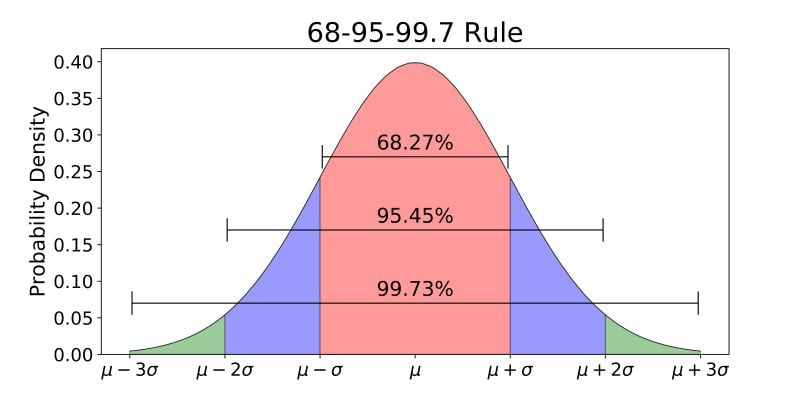

In [ ]:
age_mean = np.nanmean(titanic_train['age'].values.tolist())
age_std = np.nanstd(titanic_train['age'].values.tolist())

age_mean, age_std

(29.69911764705882, 14.516321150817316)

In [ ]:
titanic_train['zscore_age'] = (titanic_train['age']  - age_mean ) / age_std
titanic_train[['age', 'zscore_age']].head()

,age,zscore_age
0,22.0,-0.530377
1,38.0,0.571831
2,26.0,-0.254825
3,35.0,0.365167
4,35.0,0.365167


In [ ]:
titanic_train[(titanic_train['zscore_age'] <-3) | (titanic_train['zscore_age'] > 3)]  # Get extreme values based on z-score.

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,...,has_cabin,deck_letter,age_imputer1,age_median_imputer,age_mean_imputer,embarked_imputer_mode,cabin_imputer_unknown,title,age_knn_imputed,zscore_age
630,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.000,A23,...,1,A,80.0,80.0,80.0,S,A23,Mr,80.0,3.465126
851,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.775,-,...,0,-,74.0,74.0,74.0,S,UNKNOWN,Mr,74.0,3.051798


In [ ]:
from scipy import stats

z = stats.zscore(titanic_train[~titanic_train['age'].isna()]['age'])
z.head()

0   -0.530377
1    0.571831
2   -0.254825
3    0.365167
4    0.365167
Name: age, dtype: float64

In [ ]:
outliers_mask = ((z > 3) | (z < -3))
outliers_mask

0      False
1      False
2      False
3      False
4      False
       ...  
885    False
886    False
887    False
889    False
890    False
Name: age, Length: 714, dtype: bool

In [ ]:
titanic_train[~titanic_train['age'].isna()][outliers_mask]

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,...,has_cabin,deck_letter,age_imputer1,age_median_imputer,age_mean_imputer,embarked_imputer_mode,cabin_imputer_unknown,title,age_knn_imputed,zscore_age
630,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.000,A23,...,1,A,80.0,80.0,80.0,S,A23,Mr,80.0,3.465126
851,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.775,-,...,0,-,74.0,74.0,74.0,S,UNKNOWN,Mr,74.0,3.051798


In [ ]:
# Quantile based capping
lower_cap_percentile = np.nanpercentile(titanic_train['age'], 5)
upper_cap_percentile = np.nanpercentile(titanic_train['age'], 95)

print("5 percentile :", lower_cap_percentile)
print("95 percentile :", upper_cap_percentile)

5 percentile : 4.0
90 percentile : 56.0


In [ ]:
titanic_train.loc[[630, 851], 'age']

630    80.0
851    74.0
Name: age, dtype: float64

In [ ]:
titanic_train['age_capped'] = np.where(titanic_train['age'] > upper_cap_percentile, upper_cap_percentile, titanic_train['age'])
titanic_train[['age', 'age_capped']].iloc[[630, 851]]

,age,age_capped
630,80.0,56.0
851,74.0,56.0


Sklearn has some algorithms for outlier detection, but they are a bit complex for us at the moment.
https://scikit-learn.org/stable/modules/outlier_detection.html

## Categorical values encoding

### Label Encoder

Good for unordered categorical features. **Do not fit on validation and test, but use transform of these subsets**.

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
titanic_train['sex'].value_counts()

male      577
female    314
Name: sex, dtype: int64

In [ ]:
le = LabelEncoder()
titanic_train['sex_labeled'] = le.fit_transform(titanic_train['sex'])

In [ ]:
titanic_train.head(3)

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,...,age_imputer1,age_median_imputer,age_mean_imputer,embarked_imputer_mode,cabin_imputer_unknown,title,age_knn_imputed,zscore_age,age_capped,sex_labeled
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,-,...,22.0,22.0,22.0,S,UNKNOWN,Mr,22.0,-0.530377,22.0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,65.6344,C85,...,38.0,38.0,38.0,C,C85,Mrs,38.0,0.571831,38.0,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,-,...,26.0,26.0,26.0,S,UNKNOWN,Miss,26.0,-0.254825,26.0,0


In [ ]:
titanic_test['sex_labeled'] = le.transform(titanic_test['sex'])

In [ ]:
titanic_test[['sex','sex_labeled']].head(4)

,sex,sex_labeled
0,male,1
1,female,0
2,male,1
3,male,1


### Ordinal Encoding

Ordinal Encoding transforms each categorical feature to one new feature of integers (1 to n_categories).

We don't use the LabelEncoder for the other types of categorical variables, because it doesn't see order in them.
I.e. it may correlate the "Good" value with a value of "2", the "Bad" value with a value of "3", etc.
This is not we actually want to see.

For ordinal categories we use OrdinalEncoder

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
titanic_train['pclass'] = titanic_train['pclass'].map({1: 'First', 2: 'Second', 3: 'Third'})
titanic_train['pclass'].value_counts()

Third     491
First     216
Second    184
Name: pclass, dtype: int64

In [ ]:
oe = OrdinalEncoder(categories=[['First', 'Second', 'Third']])
titanic_train['pclass_ordinal_encoded1'] = oe.fit_transform(titanic_train['pclass'].to_frame())
titanic_train['pclass_ordinal_encoded1'].value_counts()

2.0    491
0.0    216
1.0    184
Name: pclass_ordinal_encoded1, dtype: int64

In [ ]:
oe = OrdinalEncoder(categories=[['Second', 'Third', 'First']])
titanic_train['pclass_ordinal_encoded2'] = oe.fit_transform(titanic_train['pclass'].to_frame())
titanic_train['pclass_ordinal_encoded2'].value_counts()

1.0    491
2.0    216
0.0    184
Name: pclass_ordinal_encoded2, dtype: int64

In [ ]:
titanic_train[['pclass','pclass_ordinal_encoded1', 'pclass_ordinal_encoded2']].head()

,pclass,pclass_ordinal_encoded1,pclass_ordinal_encoded2
0,Third,2.0,1.0
1,First,0.0,2.0
2,Third,2.0,1.0
3,First,0.0,2.0
4,Third,2.0,1.0


In [ ]:
oe = OrdinalEncoder(
    categories=[['Second', 'Third', 'First']],
    handle_unknown = 'use_encoded_value', # 'error' is also an option
    unknown_value = -1000,
)
titanic_train['pclass_ordinal_encoded2'] = oe.fit_transform(titanic_train['pclass'].to_frame())
titanic_train['pclass_ordinal_encoded2'].value_counts()

1.0    491
2.0    216
0.0    184
Name: pclass_ordinal_encoded2, dtype: int64

In [ ]:
pd.DataFrame({'pclass':['First', 'first']})

,pclass
0,First
1,first


In [ ]:
oe.transform(pd.DataFrame({'pclass':['First', 'first']}))

array([[    2.],
       [-1000.]])

In [ ]:
oe.transform(pd.DataFrame({'pclass':['First', 'First']}))

array([[2.],
       [2.]])

### One-hot encoding

One-hot Encoding in scikit-learn transforms categorical features with n_categories possible values into n_categories binary features, with one of them 1, and all others 0.

Sometimes it is not a good strategy to encode each unique category value with some unique number. For example, if the categories are equal (e.g. cabin or sex), the algorithm anyway interprets small and high numbers as the numbers of different significance. Thus, it can find the dependencies that do not exist!

One hot encoding is used to encode variables with three or more unique category values. Its essence lies in the fact that for each individual category of a categorical feature we create a column of zeros and ones. The 'ones' are situated in the places corresponding to the given value of the object feature.


In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
onehotencoder = OneHotEncoder(sparse_output = False)  # sparse_output = False

In [ ]:
titanic_train.head(3)

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,...,age_mean_imputer,embarked_imputer_mode,cabin_imputer_unknown,title,age_knn_imputed,zscore_age,age_capped,sex_labeled,pclass_ordinal_encoded1,pclass_ordinal_encoded2
0,0,Third,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,-,...,22.0,S,UNKNOWN,Mr,22.0,-0.530377,22.0,1,2.0,1.0
1,1,First,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,65.6344,C85,...,38.0,C,C85,Mrs,38.0,0.571831,38.0,0,0.0,2.0
2,1,Third,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,-,...,26.0,S,UNKNOWN,Miss,26.0,-0.254825,26.0,0,2.0,1.0


In [ ]:
onehotencoder.fit_transform(titanic_train[['sex']])#.todense()

<891x2 sparse matrix of type '<class 'numpy.float64'>'
	with 891 stored elements in Compressed Sparse Row format>

In [ ]:
onehotencoder.fit_transform(titanic_train[['embarked']]).todense()

matrix([[0., 0., 1., 0.],
        [1., 0., 0., 0.],
        [0., 0., 1., 0.],
        ...,
        [0., 0., 1., 0.],
        [1., 0., 0., 0.],
        [0., 1., 0., 0.]])

In [ ]:
onehotencoder.inverse_transform([[1,0,0,0,]])  # Why four categs?

array([['C']], dtype=object)

In [ ]:
onehotencoder.categories_, onehotencoder._n_features_outs

([array(['C', 'Q', 'S', nan], dtype=object)], [4])

In [ ]:
onehotencoder.get_feature_names_out()

array(['embarked_C', 'embarked_Q', 'embarked_S', 'embarked_nan'],
      dtype=object)

In [ ]:
encoded_df = pd.DataFrame(onehotencoder.fit_transform(titanic_train[['embarked']]).todense())
encoded_df.columns = onehotencoder.get_feature_names_out()
encoded_df

,embarked_C,embarked_Q,embarked_S,embarked_nan
0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0
...,...,...,...,...
886,0.0,0.0,1.0,0.0
887,0.0,0.0,1.0,0.0
888,0.0,0.0,1.0,0.0
889,1.0,0.0,0.0,0.0


In [ ]:
titanic_train = titanic_train.join(encoded_df)

In [ ]:
titanic_train.head(2)

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,...,age_knn_imputed,zscore_age,age_capped,sex_labeled,pclass_ordinal_encoded1,pclass_ordinal_encoded2,embarked_C,embarked_Q,embarked_S,embarked_nan
0,0,Third,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,-,...,22.0,-0.530377,22.0,1,2.0,1.0,0.0,0.0,1.0,0.0
1,1,First,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,65.6344,C85,...,38.0,0.571831,38.0,0,0.0,2.0,1.0,0.0,0.0,0.0


In [ ]:
!pip install category_encoders

In [ ]:
import category_encoders as ce

ohe_encoder = ce.OneHotEncoder(cols=['embarked'], use_cat_names=True)

titanic_train_ce = ohe_encoder.fit_transform(titanic_train[['embarked']])  # you can actually pass the entire df here
#titanic_train_ce = ohe_encoder.fit_transform(titanic_train.drop(columns=['embarked_S',	'embarked_C',	'embarked_Q',	'embarked_nan']))
titanic_train_ce.head(3)
# The column 'embarked' was deleted
# There are three new columns in the dataframe


,embarked_S,embarked_C,embarked_Q,embarked_nan
0,1,0,0,0
1,0,1,0,0
2,1,0,0,0


In [ ]:
encoder = ce.OneHotEncoder(
    cols=['sex', 'embarked'],
    handle_unknown='indicator',
    handle_missing='indicator',
    use_cat_names=True
)
encoded_train = encoder.fit_transform(titanic_train[['age', 'sex', 'embarked']])
encoded_test= encoder.transform(titanic_test[['age', 'sex', 'embarked']])

# set handle_unknown to ‘indicator’ => add a new column indicates unknown category value
# set handle_missing to ‘indicator’ => add a new column indicates missing value
# other handle_unknown/handle_missing option：
# ‘error’：report error; ‘return_nan’：mark misssing/unknown as nan;
# ‘value’：mark misssing/unknown as 0;

# feature Sex => 4 new columns: 'male' => [1 ,0 ,0, 0];
#                               'female' => [0 ,1 ,0, 0];
#                                unknown =>  [0 ,0 ,0, 1];
#                                missing => [0, 0, 1, 0];

In [ ]:
encoded_train.head(3)

,age,sex_male,sex_female,sex_nan,sex_-1,embarked_S,embarked_C,embarked_Q,embarked_nan,embarked_-1
0,22.0,1,0,0,0,1,0,0,0,0
1,38.0,0,1,0,0,0,1,0,0,0
2,26.0,0,1,0,0,1,0,0,0,0


Do we really need exactly three columns for three unique categories?

### Dummy encoding

In [ ]:
dummy_encoding = pd.get_dummies(titanic_train, columns = ['embarked'])

In [ ]:
dummy_encoding

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,...,sex_labeled,pclass_ordinal_encoded1,pclass_ordinal_encoded2,embarked_C,embarked_Q,embarked_S,embarked_nan,embarked_C,embarked_Q,embarked_S
0,0,Third,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,-,...,1,2.0,1.0,0.0,0.0,1.0,0.0,0,0,1
1,1,First,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,65.6344,C85,...,0,0.0,2.0,1.0,0.0,0.0,0.0,1,0,0
2,1,Third,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,-,...,0,2.0,1.0,0.0,0.0,1.0,0.0,0,0,1
3,1,First,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,...,0,0.0,2.0,0.0,0.0,1.0,0.0,0,0,1
4,0,Third,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,-,...,1,2.0,1.0,0.0,0.0,1.0,0.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,Second,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,-,...,1,1.0,0.0,0.0,0.0,1.0,0.0,0,0,1
887,1,First,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,...,0,0.0,2.0,0.0,0.0,1.0,0.0,0,0,1
888,0,Third,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,-,...,0,2.0,1.0,0.0,0.0,1.0,0.0,0,0,1
889,1,First,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,...,1,0.0,2.0,1.0,0.0,0.0,0.0,1,0,0


In [ ]:
titanic_train.embarked.isna().any()

True

In [ ]:
titanic_train[titanic_train.embarked.isna()]

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,...,age_knn_imputed,zscore_age,age_capped,sex_labeled,pclass_ordinal_encoded1,pclass_ordinal_encoded2,embarked_C,embarked_Q,embarked_S,embarked_nan
61,1,First,"Icard, Miss. Amelie",female,38.0,0,0,113572,65.6344,B28,...,38.0,0.571831,38.0,0,0.0,2.0,0.0,0.0,0.0,1.0
829,1,First,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,65.6344,B28,...,62.0,2.225142,56.0,0,0.0,2.0,0.0,0.0,0.0,1.0


In [ ]:
dummy_encoding.iloc[[61,829]]

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,...,sex_labeled,pclass_ordinal_encoded1,pclass_ordinal_encoded2,embarked_C,embarked_Q,embarked_S,embarked_nan,embarked_C,embarked_Q,embarked_S
61,1,First,"Icard, Miss. Amelie",female,38.0,0,0,113572,65.6344,B28,...,0,0.0,2.0,0.0,0.0,0.0,1.0,0,0,0
829,1,First,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,65.6344,B28,...,0,0.0,2.0,0.0,0.0,0.0,1.0,0,0,0


Minuses?

### Target encoding

Target encoding is a method to encode categorical variables with only one single column based on not only the feature values themselves but also the corresponding target.

For the case of categorical target: features are replaced with a blend of the posterior probability of the target given particular categorical value and the prior probability of the target over all the training data.

For the case of continuous target: features are replaced with a blend of the expected value of the target given particular categorical value and the expected value of the target over all the training data.

This method relies heavily on the distribution of the target. But it significantly reduces the number of encoded features generated.

**Smoothing**. The idea is to blend the in-category average with the overall average. Rare categories get less weight on their category average, while missing categories just get the overall average.

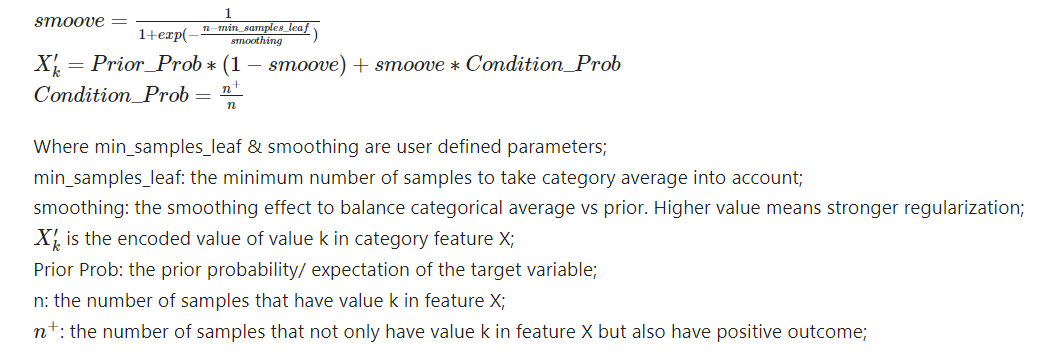

In [ ]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.3 MB/s eta 0:00:00


In [ ]:
from category_encoders.target_encoder import TargetEncoder

In [ ]:
titanic_train[titanic_train.age.isna() | titanic_train.embarked.isna()].index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=179)

In [ ]:
encoder = TargetEncoder(
    cols=['age','embarked'],
    handle_unknown='value',
    handle_missing='value'
).fit(titanic_train[['age','embarked', 'fare']], titanic_train[['survived']])

In [ ]:
encoded_train = encoder.transform(titanic_train[['age','embarked', 'fare']])
encoded_test = encoder.transform(titanic_test[['age','embarked', 'fare']])

In [ ]:
encoded_train.iloc[titanic_train[titanic_train.age.isna() | titanic_train.embarked.isna()].index]

,age,embarked,fare
5,0.293785,0.389591,8.4583
17,0.293785,0.336957,13.0000
19,0.293785,0.553571,7.2250
26,0.293785,0.553571,7.2250
28,0.293785,0.389591,7.8792
...,...,...,...
859,0.293785,0.553571,7.2292
863,0.293785,0.336957,65.6344
868,0.293785,0.336957,9.5000
878,0.293785,0.336957,7.8958


In [ ]:
# Lets try with toy dataset
train_set = pd.DataFrame(np.array([['male',10],['female', 20], ['male',10],
                       ['female',20],['female',15]]),
             columns = ['Sex','Type'])
train_y = np.array([False, True, True, False, False])

# create some test set, include unknown category & missing value
test_set = pd.DataFrame(np.array([['female',20],['male', 20], ['others',15],
                       ['male',20],['female', 40], ['male', 25]]),
             columns = ['Sex','Type'])
test_set.loc[4,'Type'] = np.nan

In [ ]:
train_set

,Sex,Type
0,male,10
1,female,20
2,male,10
3,female,20
4,female,15


In [ ]:
test_set

,Sex,Type
0,female,20
1,male,20
2,others,15
3,male,20
4,female,NaN
5,male,25


In [ ]:
train_y

array([False,  True,  True, False, False])

In [ ]:
encoder = TargetEncoder(cols=['Sex','Type'],
                        handle_unknown='value',
                        handle_missing='value').fit(train_set,train_y)

In [ ]:
encoded_train = encoder.transform(train_set)
encoded_test = encoder.transform(test_set)

In [ ]:
encoded_train

,Sex,Type
0,0.414185,0.414185
1,0.389702,0.414185
2,0.414185,0.414185
3,0.389702,0.414185
4,0.389702,0.347957


In [ ]:
encoded_test

,Sex,Type
0,0.389702,0.414185
1,0.414185,0.414185
2,0.400000,0.347957
3,0.414185,0.414185
4,0.389702,0.400000
5,0.414185,0.400000


In [ ]:
prior = train_y.mean()
prior

0.4

In [ ]:
min_samples_leaf = 20 # default
# For regularization the weighted average between category mean and global mean is taken.
# The weight is an S-shaped curve between 0 and 1 with the number of samples for a category on the x-axis.
# The curve reaches 0.5 at min_samples_leaf

smothing = 10 # default
# smoothing effect to balance categorical average vs prior.
# Higher value means stronger regularization. The value must be strictly bigger than 0.

n = 2 # 2 samples have male tag in train_set
n_positive = 1 # only one of them has positive outcome

In [ ]:
𝑠𝑚𝑜𝑜𝑣𝑒 = 1 / (1 + np.exp(-(n - min_samples_leaf) / smothing))
male_encode = prior * (1-𝑠𝑚𝑜𝑜𝑣𝑒) + 𝑠𝑚𝑜𝑜𝑣𝑒 * n_positive/n
male_encode

0.4141851064900488

[See further](https://contrib.scikit-learn.org/category_encoders/targetencoder.html)

### Hashing Encoding

Hashing Encoding is based on the technique known as feature hashing. It applies a **hash function** to the features to map data of arbitrary number of features to fixed-size features. The hash function **might cause collisions** between features. The advantage of the hashing encoder is that it does not maintain a predefined dictionary of observed categories. Consequently, the encoder does not grow in size and accepts new values during data scoring by design.

In [ ]:
from category_encoders.hashing import HashingEncoder

In [ ]:
encoder = HashingEncoder(
    cols=['sex', 'age'],
    n_components = 1
).fit(titanic_train)

encoded_train = encoder.transform(titanic_train)

In [ ]:
encoder.inverse_transform(encoded_train)

AttributeError: 'HashingEncoder' object has no attribute 'inverse_transform'

In [ ]:
encoded_train.head()

,col_0,survived,pclass,name,sibsp,parch,ticket,fare,cabin,embarked,...,age_knn_imputed,zscore_age,age_capped,sex_labeled,pclass_ordinal_encoded1,pclass_ordinal_encoded2,embarked_C,embarked_Q,embarked_S,embarked_nan
0,2,0,Third,"Braund, Mr. Owen Harris",1,0,A/5 21171,7.2500,-,S,...,22.0,-0.530377,22.0,1,2.0,1.0,0.0,0.0,1.0,0.0
1,2,1,First,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0,PC 17599,65.6344,C85,C,...,38.0,0.571831,38.0,0,0.0,2.0,1.0,0.0,0.0,0.0
2,2,1,Third,"Heikkinen, Miss. Laina",0,0,STON/O2. 3101282,7.9250,-,S,...,26.0,-0.254825,26.0,0,2.0,1.0,0.0,0.0,1.0,0.0
3,2,1,First,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0,113803,53.1000,C123,S,...,35.0,0.365167,35.0,0,0.0,2.0,0.0,0.0,1.0,0.0
4,2,0,Third,"Allen, Mr. William Henry",0,0,373450,8.0500,-,S,...,35.0,0.365167,35.0,1,2.0,1.0,0.0,0.0,1.0,0.0


How much columns we will get for cabin in OHE, dummy, target encodings?

In [ ]:
titanic_train.cabin.nunique()

148

In [ ]:
encoder = HashingEncoder(
    cols=['cabin'],
    n_components = 5
).fit(titanic_train)

encoded_train = encoder.transform(titanic_train)
encoded_train.head()

,col_0,col_1,col_2,col_3,col_4,survived,pclass,name,sex,age,...,age_knn_imputed,zscore_age,age_capped,sex_labeled,pclass_ordinal_encoded1,pclass_ordinal_encoded2,embarked_C,embarked_Q,embarked_S,embarked_nan
0,0,1,0,0,0,0,Third,"Braund, Mr. Owen Harris",male,22.0,...,22.0,-0.530377,22.0,1,2.0,1.0,0.0,0.0,1.0,0.0
1,0,0,0,0,1,1,First,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,...,38.0,0.571831,38.0,0,0.0,2.0,1.0,0.0,0.0,0.0
2,0,1,0,0,0,1,Third,"Heikkinen, Miss. Laina",female,26.0,...,26.0,-0.254825,26.0,0,2.0,1.0,0.0,0.0,1.0,0.0
3,1,0,0,0,0,1,First,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,...,35.0,0.365167,35.0,0,0.0,2.0,0.0,0.0,1.0,0.0
4,0,1,0,0,0,0,Third,"Allen, Mr. William Henry",male,35.0,...,35.0,0.365167,35.0,1,2.0,1.0,0.0,0.0,1.0,0.0


In [ ]:
# hash the dataset with two columns into N columns
# hashing encoding results has nothing to do with the content in train_set
# we can fit the hasher on any dataset as long as the column names matches
# it is only deternmined by the hashing function
# normally hashing encoding should be apply to higher & sparser dimensional space

# HW 1: EDA on movielens dataset

**Instructions:**
1. For some tasks you will need to join tables together ([See pandas docs](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html))
2. When deciding on your score, following points will be taken into account:
    <br> 1) reproducibility of your results;
    <br> 2) naming of variables and readability of your code, code style;
    <br> 3) While answering a question you should provide not only the code, but a short commentary on the results and a visualization if possible.
    <br> 4) Plots and visualization should have proper size, labels on X, Y axes, a legend if possible. It is better not to add the additional information you do not use to answer a question to the plot.
3. If you believe there is not enough data in the dataset to answer a question, state so in your answer, explain why.
4. Tasks with * are OPTIONAL, of higher difficulty - for those students, who aim at 9-10 scores.

**DEADLINE: 02.03.2024 23:59**

Send .ipynb file or a link to colab to *anastasia_kozlova94@mail.ru* with topic **ИАД и введение в МО 2024 HW1 {ваше имя и фамилия}**


[Movielens dataset metadata and readme](https://grouplens.org/datasets/movielens/)

[Occupations categories mapping](https://files.grouplens.org/datasets/movielens/ml-1m-README.txt)



In [ ]:
import pandas as pd

In [ ]:
movies = pd.read_csv('drive/MyDrive/movielens/movie.csv')
ratings = pd.read_csv('drive/MyDrive/movielens/rating.csv')
tags = pd.read_csv('drive/MyDrive/movielens/tag.csv')
users = pd.read_csv('drive/MyDrive/movielens/users.csv')

In [ ]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40


In [ ]:
tags.head()

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,2009-04-24 18:19:40
1,65,208,dark hero,2013-05-10 01:41:18
2,65,353,dark hero,2013-05-10 01:41:19
3,65,521,noir thriller,2013-05-10 01:39:43
4,65,592,dark hero,2013-05-10 01:41:18


In [ ]:
users.head()

,Unnamed: 0,user_id,gender,age,occupation,zip-code
0,0,1,F,1,10,48067
1,1,2,M,56,16,70072
2,2,3,M,25,15,55117
3,3,4,M,45,7,02460
4,4,5,M,25,20,55455


### Are there any missing values in the tables? If there are, how would you deal with them?

### How many unique movies, genres, tags are there in the dataset?

### **Movies:** Are there any movies with the same title? Do they also have same genres, tags? Do you think those are duplicates\errors in data?

### **Ratings**: Create a new feature: average rating per movie

### **Ratings**: what is the max, min, median, mean rating? Plot the distribution.

### **Ratings**: Give a characteristic to the spread of rating, skew and kurtosis.

### **Ratings**: get max, min, median, mean rating for each genre.

### * **Ratings**: By using timestamp column, plot how average rating chaged for each genre over time (for example, each month or week or year).

### **Ratings**:  select two movies you are interested in and get max, min, median, mean rating for them. How many users gave a high rating\low rating to this films?

### * **Ratings**: By using timestamp column, plot how average rating chaged for your selected movie over time (for example, each month or week).

### **Ratings**: Plot top 10 most highly rated movies

### **Ratings**: Plot top 10 movies with the lowest overall rating

### * **Ratings**: Plot top 10 movies with the highest and lowest overall rating in 5 selected time moments (e.g. as to see what movies get highly rated in  winter, summer, etc.)

### **Ratings**: Plot top 30 movies with higher number of ratings (events) (it does not matter how high the rating score)

### **Ratings**: Plot top 30 movies with lowest number of ratings(events) (it does not matter how high the rating score) - the movies which are the rarest to be rated

### **Movies**: Apply encoding to the genres column

### **Tags**: Find top 30 most frequent tags

### **Ratings**: Find the id of the user who rated more movies than other users. Who is that user by age\occupation\movie taste?

### Extract the release year from the movie name. Find average rating for each release year. In which years these seems to be produced more films with high overall rating?

### **Movies**: Count the number of films released in each year

### **Movies**: Count the number of movies of particular genres released in each year. Which genres are prevalent in each year? What is the most popular genre overall and most highly rated genre?

### *** Group 'ratings' table by userID and sort by timestamp. Represent each user as a ordered sequence of the movies he\she interacted with(rated).
Lets say these interactions allow us to encode user`s interests and preferences. Can you find any frequent patters in these sequences? (Such as, if a person rated Shrek1 high, he\she is very probable to watch\rate Shrek2 high as well). Hint: you may try to treat such sequences like sequences of tokens in NLP and apply your knowledge in this area. Or you may check out special python libraries like Seq2Pat.

### Select movies that were rated less than 30 times

### Only 10% of the movies have a rating higher than N. Find N. (Hint: see quantiles)

### What are the top 5 genres which have the highest number of movies?

### Create 2 boxplots in the same plot comparing the total number of voters(rating events) for two genres

### What are the 2 genres with higher correlation with the average rating? And the 2 genders with lowest correlation?

### Plot user age distribution, find suitable central tendency and spread characteristic

### * How many ratings were submitted per month? How are the ratings distributed? How consistent are the average ratings over time?

### How preferences in genres, release years change with gender, occupation and age of the user?

### Come up with two additional questions and answer them.